# 2º Semana Acelera Dev Data Science | Manipulação de Dados |

### Por: José Aldanildo

Nesse dataset é sobre a movimentação de compras de um loja durante a black friday 

- Análise exploratória com o objetivo de compreender o perfil dos consumidores e o conjunto de dados;
- Desenvolvimento das questão requisitadas, obtendo a pontuação máxima e demonstração da estratégia de resolução adotada;
- Aprofundamento teórico na tarefa de escalonamento de características, tratando técnicas de Normalização e Padronização - dos dados.

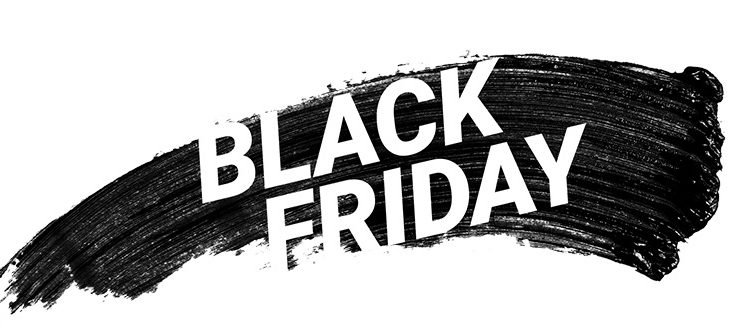

In [75]:
Image('black-friday_MOBILE-750x336.jpg',width = 650)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
black_friday = pd.read_csv('black_friday.csv') # importanto o dataset black friday para análise
black_friday.head()  # Gerando o cabeçalho do dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
black_friday.info()  # Gerando informações importantes sobre o dataset, podemos notar que o dataset tem 537577 linhas e 12 colunas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [13]:
black_friday.isnull().sum() # com esse comando podemos saber quantos valores nulos existem no dataset,notamos que temos valores nulos nas colnas Product_Category_2 

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Análise Exploratoria 

- Qual o gênero e estado civil da maioria dos consumidores ? 

Text(0.5, 0, 'Estado Civil')

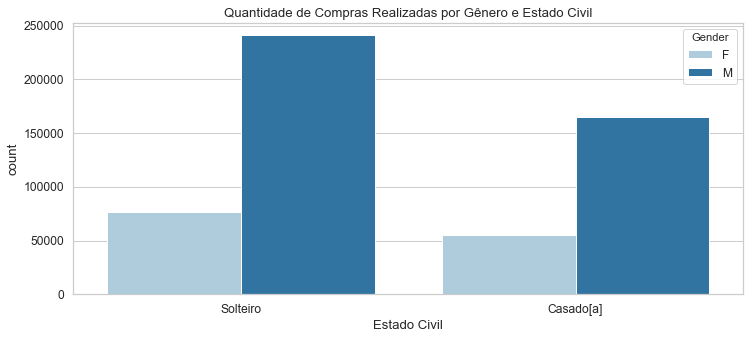

In [22]:
marital_gender = black_friday[['Marital_Status','Gender']]
marital_gender['Marital_Status'].replace([0,1],value = ['Solteiro','Casado[a]'],inplace = True)
sns.set(style = 'whitegrid',palette = 'Paired',font_scale = 1.1)
sns.countplot(x = 'Marital_Status',hue = 'Gender',data = marital_gender)
plt.title('Quantidade de Compras Realizadas por Gênero e Estado Civil')
plt.xlabel('Estado Civil')

Atraveis da análise podemos observar que o genero masculino é o que mais compra durante a black friday

- Qual faixa etaria de idade mas consome durente a black friday ?

In [24]:
black_friday[['Age','Purchase']].head()  # primeiro vamos ver como estão os dados na coluna idade e compra

,Age,Purchase
0,0-17,8370
1,0-17,15200
2,0-17,1422
3,0-17,1057
4,55+,7969


In [25]:
black_friday['Age'].value_counts() # vamos agora saber como se econtra os dados agrupados por idade na coluna idade

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

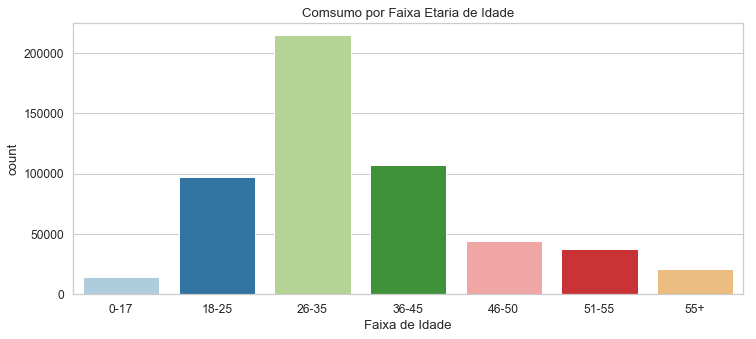

In [37]:
order_age = sorted(black_friday['Age'].unique())
sns.countplot(x = 'Age',order = order_age,data = black_friday);
plt.title('Comsumo por Faixa Etaria de Idade')
plt.xlabel('Faixa de Idade');

Os maiores consumidores estar na faixa etaria de 26-35 anos

- Qual a faxa etaria dos conumidores relializam compras de maior valor durante a black friday ?

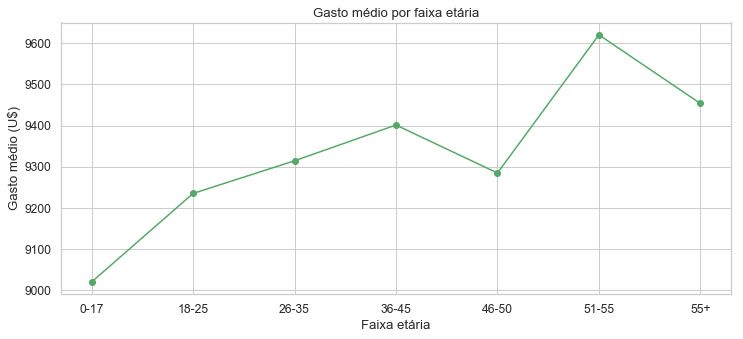

In [63]:
age_purchase = black_friday.groupby('Age')['Purchase'].mean() # agrupando a coluns idade com a media da coluna compras
age_purchase = pd.DataFrame({'Age':age_purchase.index, 'Average_purchase':age_purchase.values}) # Gerando um data frame 
plt.plot('Age', 'Average_purchase', 'go-', data=age_purchase, ); # gerando um grafico com data frame criado
plt.xlabel('Faixa etária') 
plt.ylabel('Gasto médio (U$)') 
plt.title('Gasto médio por faixa etária');

As compras de maiores valores são realizadas pelos comsumidores entre 51-55 anos 

- Qual a relação entre consumo e tempo de permanecia do morador na cidade ?

In [66]:
black_friday['Stay_In_Current_City_Years'].value_counts() # primeiro vamos entender como estar os dados na coluna anos cidade

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

Text(0, 0.5, 'contagem')

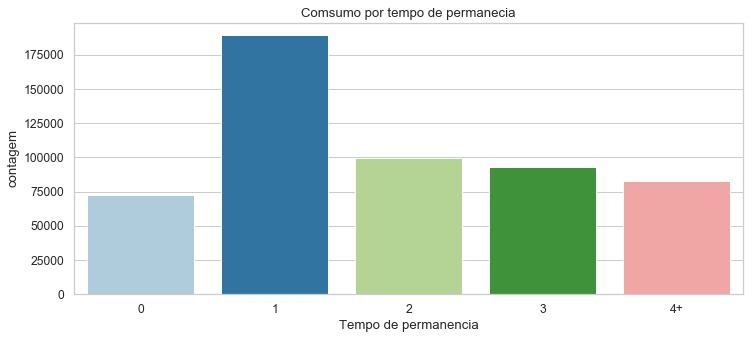

In [67]:
order_years = sorted(black_friday['Stay_In_Current_City_Years'].unique()) # colocando em ordem a coluna 'Stay_In_Current_City_Years em valores unicos
sns.countplot(x = 'Stay_In_Current_City_Years',order = order_years,data = black_friday) # Gerando um grafico de contagem
plt.title('Comsumo por tempo de permanecia') 
plt.xlabel('Tempo de permanencia')
plt.ylabel('contagem')

Podemos observar que a maioria fica um ano na cidade, mas sera que os maiores comsumidores fica nessa faixa de um ano na cidade ?

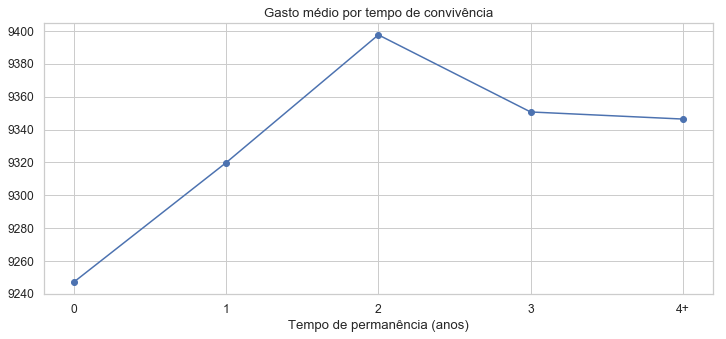

In [69]:
stay_purchase = black_friday.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
stay_purchase = pd.DataFrame({'Stay_In_Current_City_Years':stay_purchase.index, 'Average_purchase':stay_purchase.values})
plt.plot('Stay_In_Current_City_Years', 'Average_purchase', 'bo-', data=stay_purchase);
plt.xlabel('Tempo de permanência (anos)')
plt.title('Gasto médio por tempo de convivência');

Já nesse grafico podemos ver que os maiores compradores fica em media  dois anos na cidade 

Nesse notbook usamos as bibliotecas :
    - Numpy 
    -Pandas
    -Matplotlib
    -Seaborn
Turma essa é uma análise rapida só para obtermos melhor a compreensão do dataset disponibilizado para tratamento

## FIM